# Module 4 Reverse Classroom Notebook

## ANOVAs

ANOVA stands for Analysis of Variance and is an extension of the t-tests and z-tests that we looked at in class. ANOVAs are used to compare the means between two groups, however unlike t and z-tests (which are design for comparing only 2 groups) the ANOVA can be used to compare three or more groups together. As such, the ANOVA tests the null hypothesis that the groups are equal in means and the alternative hypothesis that the groups are different in means. Note that with multiple groups, the ANOVA does not explicitly test **which** of the groups are different, just that there is an overall difference between the groups. To identify exactly which group is higher or lower than another, we need to conduct additional tests to compare the individual groups (which we'll discuss later).

As the name suggests, the logic behind the ANOVA is to compare variance. Specifically, the ANOVA compares the variance between each group mean and the overall mean (i.e., the deviation between the mean in each group with the mean of the overall sample - called between group variation) to the overall variance on the dependent variable (i.e., the usual deviation between every data point and the overall mean - called within group variation). If the variance between the groups is bigger than the variance within the groups then this indicates that there is a significant difference between the groups. The ANOVA compares this variance by calculating an $F$ statistic, which is computed by taking the mean sum of squares between groups (i.e., how much variance is there between the groups) and dividing it by the mean of sqaured errors (i.e., the usual summed deviations between each data point and the overall mean of the data, which is this case picks out how much variance there is within groups):

$$
F = \frac{MSB}{MSE} 
$$

The higher the value of the $F$ statistic, the bigger the between group variation and the more unlikely that the difference between the groups is due to chance. You can read more about the formulas for calculating the ANOVA F statistic [here](https://www.pythonfordatascience.org/anova-python/) and [here](https://byjus.com/anova-formula/). The main idea is that if the variance between the groups is greater than the variance that is due to error, which comes from variation within the groups, then the groups are more different than they are similar, and hence there is a difference between the groups.

We can perform an ANOVA in Python using the `scipy.stats` module. The `f_oneway` function takes several arrays of data as arguments, with each array representing your groups. For example, lets test if theres a difference in the weight of the different species from the penguins dataset:

In [2]:
import seaborn as sns
import scipy.stats as stats

In [3]:
df = sns.load_dataset("penguins")

In [4]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
# Split the data into three arrays:

group_1 = df["body_mass_g"][df["species"]=="Adelie"].dropna()
group_2 = df["body_mass_g"][df["species"]=="Chinstrap"].dropna()
group_3 = df["body_mass_g"][df["species"]=="Gentoo"].dropna()

In [6]:
group_1

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
147    3475.0
148    3450.0
149    3750.0
150    3700.0
151    4000.0
Name: body_mass_g, Length: 151, dtype: float64

In [7]:
stats.f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=343.626275205481, pvalue=2.892368133377283e-82)

We can also generate an ANOVA test using the `statsmodel` package, which gives additional output such as the sum of squares for within and between groups:

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('body_mass_g ~ C(species)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(species),1.468642e+08,2.0,343.626275,2.892368e-82
Residual,7.244348e+07,339.0,NaN,NaN


From the above you can see that the F statistic is very high, and the p_value is very low, so we would conclude that there is a significant difference between the penguin species in body mass. However, the ANOVA doesn't tell you which group is different. If we plot the means, we'll see that the Adelie and Chinstrap are fairly similar in weight, but the Gentoo is much heavier. 

In [17]:
df.groupby("species")["body_mass_g"].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

To test which of these groups is different to the other, we would conduct additional t-tests to compare each group individually. This is often called **post-hoc tests**, as they're additional tests that take place after the main ANOVA. There are several types of post-hoc tests, but a commonly used one is [Tukey's HSD Test](https://en.wikipedia.org/wiki/Tukey%27s_range_test). We can again compute this using the stats module:

In [22]:
print(stats.tukey_hsd(group_1, group_2, group_3))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -32.426     0.881  -191.352   126.500
 (0 - 2)  -1375.354     0.000 -1507.529 -1243.179
 (1 - 0)     32.426     0.881  -126.500   191.352
 (1 - 2)  -1342.928     0.000 -1507.375 -1178.481
 (2 - 0)   1375.354     0.000  1243.179  1507.529
 (2 - 1)   1342.928     0.000  1178.481  1507.375



From the above we can see that the Adelie and Chinstrap penguins are not significantly different (the first row in the table, comparing group 0 (Adelie) with group 1 (Chinstrap). However, we can see that the Gentoo penguin is significantly heavier than both the Adelie (comparison 0-2) and the Chinstrap (comparison 1-2) penguins. 

Note that here we've conducted what's called a **one-way ANOVA** because we had one variable (penguin species) that had 3 different groups (Adelie, Chinstrap and Gentoo). It's also possible to add additional variables to the ANOVA to conduct two-way ANOVAS, which look at the differences between groups and also the interaction between groups from different variables. You can read more about these [here](https://www.reneshbedre.com/blog/anova.html?utm_content=cmp-true) or [here](https://towardsdatascience.com/two-way-anova-test-with-python-a112e2396d78).

## Chi Square

The Chi-Square test is used to assess whether two categorical variables are associated with each other. For example, we might want to see whether survival rates from a particular disease are associated with someone's sex. The chi-square test works by comparing the frequencies of each category with the frequencies we would expect to see if the two variables were unrelated (i.e., the null hypothesis was true). As such, chi-square tests work with contingency tables (sometimes called crosstabs) which summarise the frequency of data within each category, like in the example below:

|  | Did Not Survive | Survived| 
| --- | --- | --- | 
| Male | 123 | 211 |
| Female | 110 | 249 | 

The chi-square statistic is computed by comparing the **observed frequencies** (the ones we have above) with the **expected** frequencies (what we would expect if the null hypothesis was true, which results in the proportions of one variable being the same for all values of the other variable). We can compute the expected frequencies with the below formula:

$$
\frac{r*c}{N}
$$

Where:
- $r$ is the row total
- $c$ is the column total
- $N$ is the sample size

For example, lets first add our row and column totals to the above data:

|  | Did Not Survive | Survived| Row Total |
| --- | --- | --- | --- |
| Male | 123 | 211 | 334 |
| Female | 110 | 249 | 359 |
| **Column Totals** | 233 | 460 | 693 |

Based on this our expected frequencies would be:

|  | Did Not Survive | Survived| Row Total |
| --- | --- | --- | --- |
| Male | 112.30  | 221.70 | 334 |
| Female | 120.70 | 238.30 | 359 |
| **Column Totals** | 233 | 460 | 693 |

For example, for Males who did not survive our equation would be 334*233/693 = 112.30. By using the row and column totals, the expected frequencies are calculated such that the proportions between each variable is equal (e.g., the proprotion of males and females who did not survive is the same).

The chi-square statistic compares these observed and expected frequencies using the below formula:

$$
x^2 = \sum\frac{(O - E)^2}{E}
$$

Where:

- $O$ is the observed frequencies
- $E$ is the expected frequencies

The chi-square statistic captures how much the observed frequencies differ from the expected, so the larger the chi-square value, the less likely we would have acheived it just by chance if the null hypothesis was true (and hence, the more likely there is some associated between the two categorical variables). You can read more about the formula [here](https://www.scribbr.com/statistics/chi-square-test-of-independence/)

In python we can compute the chi-square using the `scipy` package and the `chi2_contingency` function. This takes your contingency table passed in as a 2d array, like so:

In [11]:
from scipy.stats import chi2_contingency
data = [[123, 211], [110, 249]]
print(chi2_contingency(data))

Chi2ContingencyResult(statistic=2.6957450705336816, pvalue=0.10061644494492511, dof=1, expected_freq=array([[112.2972583, 221.7027417],
       [120.7027417, 238.2972583]]))


As you can see, here our p value is not below the $p < .05$ threshold, so we would conclude that there is not a signficant associate between sex and survival.

## K-Means Clustering

K-Means clustering is an unsupervised machine learning technique that tries to identify data points that are similar to each other. This allows us to pick out patterns in the data or identify groups. As an unsupervised model, KMeans identifies clusters from the data itself (i.e., we won't need any pre-labelled data that tells us what our clusters are). The only input the model needs from us is to determine how many clusters we want to model to identify, usually denotated as $k$.

The algorithm works by first plotting $k$ **centroids** onto your data. A centroid is effectively the centre of a cluster. It then takes each data point and assigns it to a particular cluster by calculating what its nearest centorid is. For each cluster, a new centroid is then computed by taking the average of each data point in the cluster (hence the name KMeans), which provides a new central point to the cluster. The process then repeats (so again, we would take each data point and calculate what its nearest centroid is using the new centroids and reassign each data point to clusters accordingly). We repeat this process over and over until the centroids **stabalise**, that is, they no longer change their location. For a visual example of how this works, check out this [website](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/).

Let's see an example using the `iris` dataset:

In [14]:
import seaborn as sns
sns.set_theme()
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Lets plot a scatterplot that shows the relationship between petal length and petal width:

<Axes: xlabel='petal_length', ylabel='petal_width'>

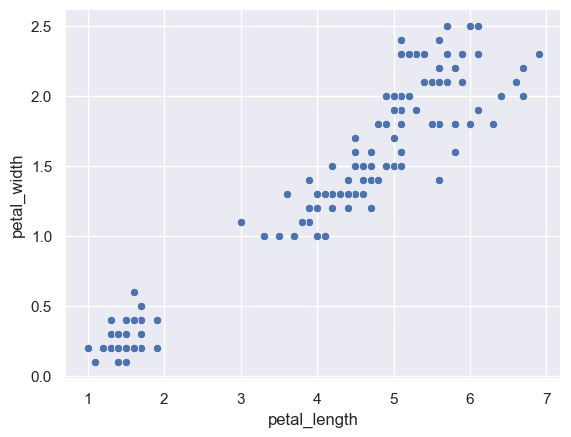

In [15]:
sns.scatterplot(x="petal_length", y="petal_width", data=df)

By looking at this scatterplot we might say there are 3 potential groups of data points, so we might fit a KMeans model with 3 clusters. We can do this using the `sklearn` library:

In [16]:
from sklearn.cluster import KMeans
X = df[["petal_length", "petal_width"]]

Kmean = KMeans(n_clusters=3)
Kmean.fit(X)

C:\Users\Benda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Benda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

We can see the centroids of our clusters with the below:

In [17]:
Kmean.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

As plot them on our scatterplot like so:

<Axes: xlabel='petal_length', ylabel='petal_width'>

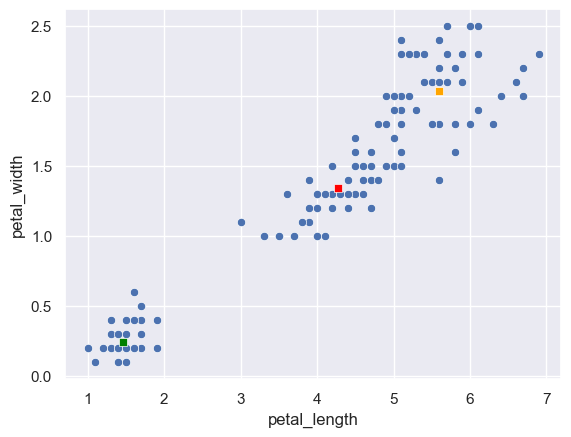

In [27]:
sns.scatterplot(x="petal_length", y="petal_width", data=df)
sns.scatterplot(x=[Kmean.cluster_centers_[0][0]], y=[Kmean.cluster_centers_[0][1]], color="red", marker="s")
sns.scatterplot(x=[Kmean.cluster_centers_[1][0]], y=[Kmean.cluster_centers_[1][1]], color="green", marker="s")
sns.scatterplot(x=[Kmean.cluster_centers_[2][0]], y=[Kmean.cluster_centers_[2][1]], color="orange", marker="s")

We can see which cluster each data point has been assigned to with the below:

In [29]:
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

If we assign this back to our dataframe, we can colour each data point based on the cluster it has been assigned to:

In [30]:
df["cluster"] = Kmean.labels_

In [31]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


<Axes: xlabel='petal_length', ylabel='petal_width'>

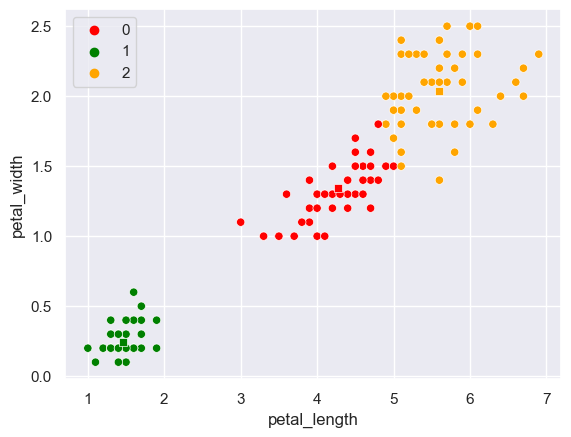

In [36]:
sns.scatterplot(x="petal_length", y="petal_width", data=df, hue="cluster", palette=["red", "green", "orange"])
sns.scatterplot(x=[Kmean.cluster_centers_[0][0]], y=[Kmean.cluster_centers_[0][1]], color="red", marker="s")
sns.scatterplot(x=[Kmean.cluster_centers_[1][0]], y=[Kmean.cluster_centers_[1][1]], color="green", marker="s")
sns.scatterplot(x=[Kmean.cluster_centers_[2][0]], y=[Kmean.cluster_centers_[2][1]], color="orange", marker="s")

Crucially, KMeans does not tell you what each cluster represents. In our case it is fairly obvious as we're working with a simple dataset (each cluster is the different species of iris), however with more complex data there can be quite a bit of difficulty around trying to interpret what your clusters mean. This is especially the case if you have multiple variables included in your KMeans algorithm. 